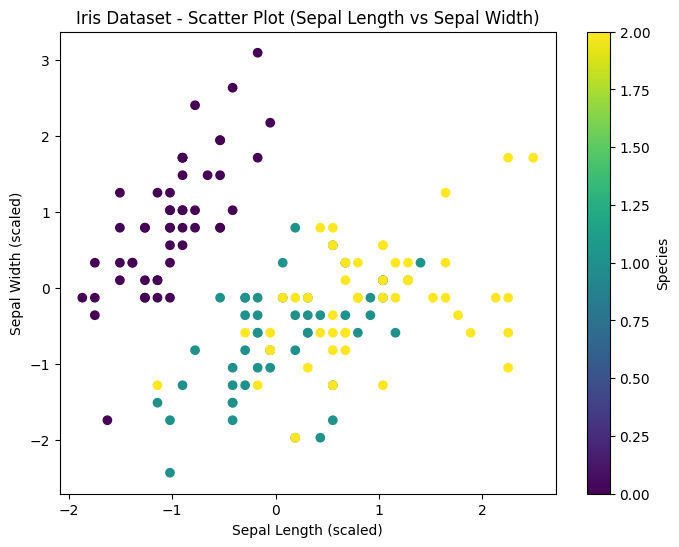

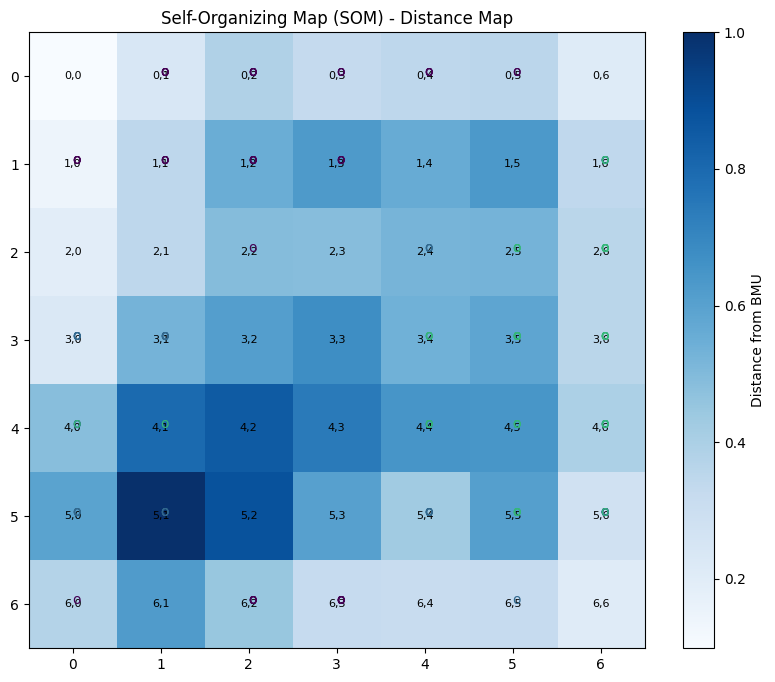

Silhouette Score: 0.241
Davies-Bouldin Score: 0.929


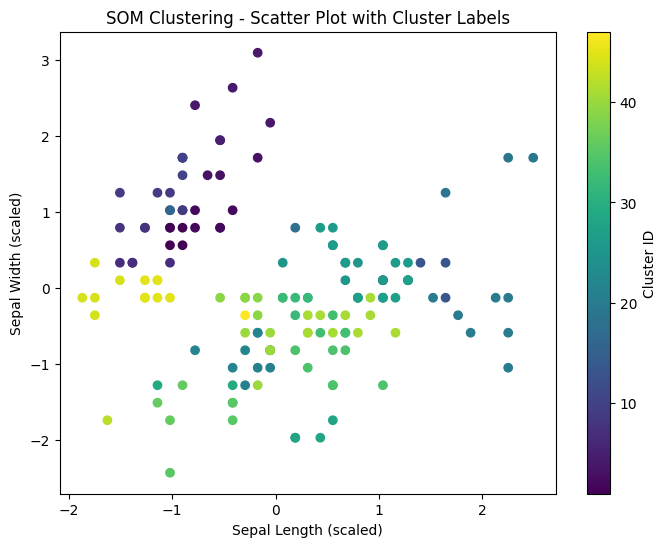


For 3 clusters:
Silhouette Score: 0.282
Davies-Bouldin Score: 1.074


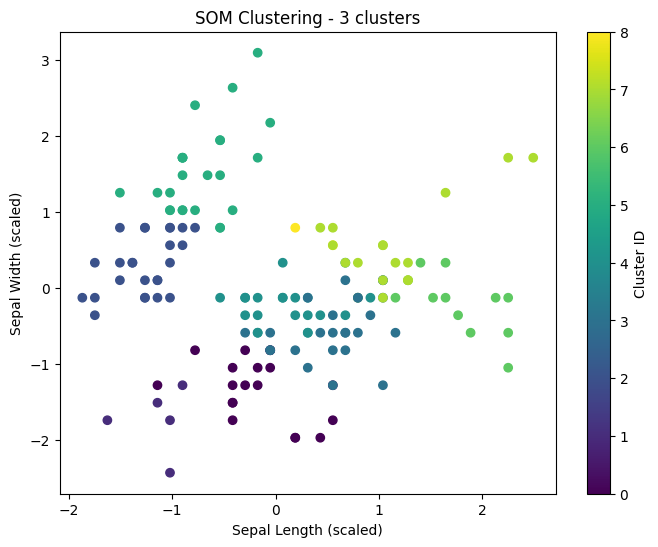


For 4 clusters:
Silhouette Score: 0.311
Davies-Bouldin Score: 0.990


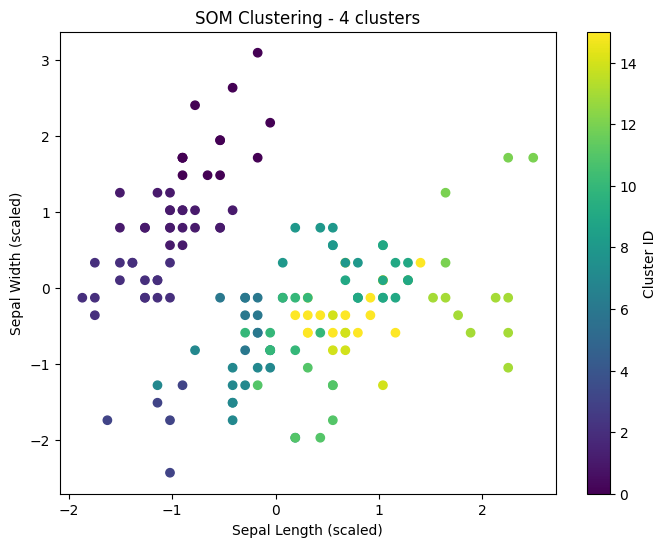


For 5 clusters:
Silhouette Score: 0.202
Davies-Bouldin Score: 1.078


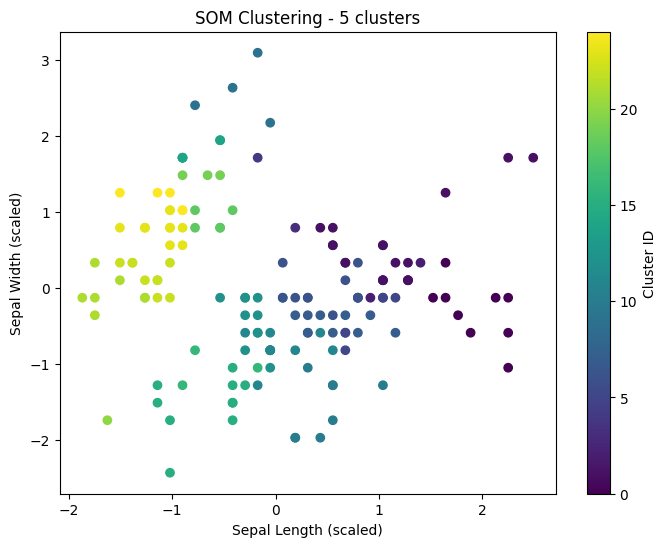

In [ ]:
# Step 1: Load the Iris Dataset
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Iris dataset
data = load_iris()
X = data.data  # features
y = data.target  # target labels

# Step 2: Pre-process the data
# Standardize the data (SOM is sensitive to the scale of input features)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Remove target variable
# We only need features for unsupervised learning

# Step 4: Plot the datapoints (first two features for visualization)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('Iris Dataset - Scatter Plot (Sepal Length vs Sepal Width)')
plt.colorbar(label='Species')
plt.show()

# Step 5: Apply SOM for clustering
from minisom import MiniSom

# Define SOM grid size
som_dim = 7  # Example 7x7 grid for visualization
som = MiniSom(som_dim, som_dim, X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)

# Train SOM
som.train(X_scaled, 500)  # Train with 500 iterations

# Step 6: Visualize the SOM grid and cluster centroids
plt.figure(figsize=(10, 8))
for i in range(som_dim):
    for j in range(som_dim):
        plt.text(j, i, f'{i},{j}', ha='center', va='center', color='black', fontsize=8)

# Color-code the output grid based on the BMUs (Best Matching Units)
win_map = som.win_map(X_scaled)
cluster_centroids = np.array([som.get_weights()[x, y] for x in range(som_dim) for y in range(som_dim)])

plt.imshow(som.distance_map().T, cmap='Blues')  # Heatmap of distance
plt.colorbar(label='Distance from BMU')
plt.title('Self-Organizing Map (SOM) - Distance Map')

# Plot points with BMU
for i, x in enumerate(X_scaled):
    win = som.winner(x)
    plt.text(win[1], win[0], 'o', color=plt.cm.viridis(y[i] / 3), fontsize=10)

plt.show()

# Step 7: Evaluate clustering performance with Silhouette Score and Davies-Bouldin Score
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assign clusters based on BMUs
som_labels = np.array([som.winner(x) for x in X_scaled])
som_labels = [x[0] * som_dim + x[1] for x in som_labels]  # Flatten indices to single value

# Calculate Silhouette Score and Davies-Bouldin Score
sil_score = silhouette_score(X_scaled, som_labels)
db_score = davies_bouldin_score(X_scaled, som_labels)

print(f'Silhouette Score: {sil_score:.3f}')
print(f'Davies-Bouldin Score: {db_score:.3f}')

# Step 8: Visualize the SOM clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=som_labels, cmap='viridis')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('SOM Clustering - Scatter Plot with Cluster Labels')
plt.colorbar(label='Cluster ID')
plt.show()

# Step 9: Repeat for multiple clusters and visualize (change som_dim)
for n_clusters in [3, 4, 5]:
    som_dim = n_clusters  # Adjust SOM grid size based on n_clusters
    som = MiniSom(som_dim, som_dim, X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
    som.random_weights_init(X_scaled)
    som.train(X_scaled, 500)

    # Assign clusters and calculate metrics
    som_labels = np.array([som.winner(x) for x in X_scaled])
    som_labels = [x[0] * som_dim + x[1] for x in som_labels]  # Flatten indices

    sil_score = silhouette_score(X_scaled, som_labels)
    db_score = davies_bouldin_score(X_scaled, som_labels)

    print(f'\nFor {n_clusters} clusters:')
    print(f'Silhouette Score: {sil_score:.3f}')
    print(f'Davies-Bouldin Score: {db_score:.3f}')

    # Visualize the clustering result
    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=som_labels, cmap='viridis')
    plt.title(f'SOM Clustering - {n_clusters} clusters')
    plt.xlabel('Sepal Length (scaled)')
    plt.ylabel('Sepal Width (scaled)')
    plt.colorbar(label='Cluster ID')
    plt.show()
